In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

2025-08-01 14:24:14.310283: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-01 14:24:14.339128: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-01 14:24:14.339153: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-01 14:24:14.339749: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-01 14:24:14.344196: I tensorflow/core/platform/cpu_feature_guar

In [2]:
#Carrega o modelo com melhor resultado
from tensorflow.keras.models import load_model

model = load_model("Material/modelo_02_expressoes.h5") 

print("Modelo carregado com sucesso!")

2025-08-01 14:24:15.489983: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-01 14:24:15.542082: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-01 14:24:15.546042: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Modelo carregado com sucesso!


In [3]:
#Carregando o vídeo
video_path = "Material/Videos/video_teste04.mp4"
cap = cv2.VideoCapture(video_path)

conectado, video = cap.read()
print(conectado, video.shape)

True (360, 640, 3)


In [4]:
#Redimensionar pois o vídeo é muito grande
redimensionar = True
largura_maxima = 600  

if (redimensionar and video.shape[1] > largura_maxima):
    proporcao = video.shape[0] / video.shape[1]
    video_largura = largura_maxima
    video_altura = int(video_largura / proporcao)
else:
    video_largura = video.shape[1]
    video_altura = video.shape[0] 

In [5]:
nome_arquivo = 'resultado_video_teste04.avi'

fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 24
saida_video = cv2.VideoWriter(nome_arquivo, fourcc, fps, (video_largura, video_altura))

2025-08-01 14:24:16.813903: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907


1/1 [==============================] - 1s 1s/step
[4.7290549e-02 6.6011376e-04 1.2068760e-01 1.1903546e-02 7.0190382e-01
 1.6176575e-03 1.1593669e-01]
1/1 [==============================] - 0s 18ms/step
[0.14702883 0.00262124 0.36889377 0.00983329 0.19212767 0.13718067
 0.14231452]
1/1 [==============================] - 0s 18ms/step
[0.05099831 0.00124556 0.36765915 0.01362373 0.36609793 0.05173194
 0.1486434 ]
1/1 [==============================] - 0s 18ms/step
[0.08505297 0.00138309 0.32517383 0.01414185 0.28903416 0.08294082
 0.2022732 ]
1/1 [==============================] - 0s 18ms/step
[0.04516294 0.00168895 0.58967423 0.00582354 0.19468981 0.1042151
 0.05874539]
1/1 [==============================] - 0s 18ms/step
[0.0443666  0.00600444 0.54794174 0.0441998  0.20077749 0.12160289
 0.03510699]
1/1 [==============================] - 0s 19ms/step
[0.03504254 0.0010741  0.24144435 0.04662091 0.5662493  0.01780157
 0.09176727]
1/1 [==============================] - 0s 19ms/step
[0.156

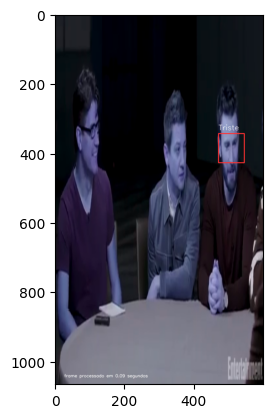

In [6]:
import time
from tensorflow.keras.preprocessing.image import img_to_array

haarcascade_faces = 'Material/haarcascade_frontalface_default.xml'
fonte_pequena, fonte_media = 0.4, 0.7
fonte = cv2.FONT_HERSHEY_SIMPLEX
expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]

while (cv2.waitKey(1) < 0):
    conectado, frame = cap.read()

    if not conectado:
        break

    t = time.time()

    if redimensionar:
        frame = cv2.resize(frame, (video_largura, video_altura))

    face_cascade = cv2.CascadeClassifier(haarcascade_faces)
    cinza = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(cinza,scaleFactor=1.2, minNeighbors=5,minSize=(30,30))

    if len(faces) > 0:
        for (x, y, w, h) in faces:
            frame = cv2.rectangle(frame,(x,y),(x+w,y+h+10),(255,50,50),2) 
            roi = cinza[y:y + h, x:x + w] 
            roi = cv2.resize(roi, (48, 48)) 
            roi = roi.astype("float") / 255.0 
            roi = img_to_array(roi) 
            roi = np.expand_dims(roi, axis=0) 

            result = model.predict(roi)[0]
            print(result)
            
            
            if result is not None:
                resultado = np.argmax(result) #encontra a emoção com maior probabilidade
                cv2.putText(frame,expressoes[resultado],(x,y-10), fonte, fonte_media,(255,255,255),1,cv2.LINE_AA) #escreve a emoção acima
            

        cv2.putText(frame, " frame processado em {:.2f} segundos".format(time.time() - t), (20, video_altura-20), fonte, fonte_pequena, (250, 250, 250), 1, cv2.LINE_AA)
        plt.imshow(frame)
        saida_video.write(frame) #grava o frame atual

print("Terminou")
saida_video.release()
cv2.destroyAllWindows()
